# WeatherPy_Walsh_Gold
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install gmaps
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension
#!pip install citipy
#!pip install openweathermapy

In [2]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys
import json
import csv
import datetime

import openweathermapy.core as owm
import os  # For getting API key from computer

In [3]:
# File to Load (Remember to change these)
quake_data_to_load = "data/earthquakes1970-2014.csv"

# Read quake Data File and store into Pandas Data Frame
quake_data = pd.read_csv(quake_data_to_load)

# Display the data table for preview
quake_data.head()


,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
0,00:40.2,24.139,102.503,31.0,7.5,Ms,90.0,NaN,NaN,0.0,NEI,1.970010e+09
1,35:51.8,-9.628,151.458,8.0,6.2,Ms,85.0,NaN,NaN,0.0,NEI,1.970011e+09
2,12:39.1,-34.741,178.568,179.0,6.1,Mb,59.0,NaN,NaN,0.0,NEI,1.970011e+09
3,07:08.6,6.825,126.737,73.0,6.1,Mb,91.0,NaN,NaN,0.0,NEI,1.970011e+09
4,05:39.0,60.280,-152.660,85.0,6.0,ML,0.0,NaN,NaN,NaN,AK,NaN


In [4]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## tried to get key from os
api_key = os.environ.get('weather_api_key')

# Output File (CSV)
output_data_file = "output_data/cities.csv"

## Generate Cities List

In [12]:
## Generate random latitude and longitudes
# Range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)

# List for holding lat_lngs tuples
lat_lng_rand = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lng_rand = zip(lats, lngs)

## Generate cities list from random latitudes and longitudes using citipy.nearest_city
# List for holding cities
cities = []

# Identify nearest city for each lat, lng combination
for x in len(quake_data):
    city = citipy.nearest_city(quake_data['Latitude'], quake_data['Logitude]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

SyntaxError: EOL while scanning string literal (<ipython-input-12-9fe4c85bab73>, line 20)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Set api for openweathermap
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create settings dictionary for key parameters
settings = {"units": "imperial", "appid": api_key}

city_name_name = ['name','clouds.all','sys.country','dt',
                  'main.humidity','coord.lat','coord.lon','main.temp_max','wind.speed']

all_in_one = []
count = 0
rec = 0
set = 1

for city in cities:

    if count == 50:
        time.sleep(1.1)
        count = 0
        rec = 0
        set+=1
    try:
        # Openweathermap API call to get current weather for a city
        current_weather_city = owm.get_current(city, **settings)
        awesome_city = current_weather_city(*city_name_name)
        count += 1
        rec += 1

        print(f"Processing Record {rec} of Set {set} | {current_weather_city['name']}.")
        all_in_one.append(awesome_city)

    except:
        print("City not found. Skipping...")
         


Processing Record 1 of Set 1 | Codrington.
Processing Record 2 of Set 1 | Katsuura.
Processing Record 3 of Set 1 | Castro.
Processing Record 4 of Set 1 | Saint-Philippe.
Processing Record 5 of Set 1 | Kaeo.
Processing Record 6 of Set 1 | Kruisfontein.
Processing Record 7 of Set 1 | Ribeira Grande.
Processing Record 8 of Set 1 | Rikitea.
City not found. Skipping...
Processing Record 9 of Set 1 | Pevek.
Processing Record 10 of Set 1 | Portland.
Processing Record 11 of Set 1 | Carnarvon.
Processing Record 12 of Set 1 | Lompoc.
Processing Record 13 of Set 1 | Mataura.
Processing Record 14 of Set 1 | Padang.
Processing Record 15 of Set 1 | Khatanga.
Processing Record 16 of Set 1 | Aleksandrovka.
Processing Record 17 of Set 1 | Kudahuvadhoo.
Processing Record 18 of Set 1 | Butaritari.
City not found. Skipping...
Processing Record 19 of Set 1 | Vinkovci.
Processing Record 20 of Set 1 | Bluff.
Processing Record 21 of Set 1 | Fortuna.
Processing Record 22 of Set 1 | Saint Anthony.
Processing Re

Processing Record 32 of Set 4 | Launceston.
Processing Record 33 of Set 4 | Syumsi.
Processing Record 34 of Set 4 | Sitka.
Processing Record 35 of Set 4 | Lodja.
Processing Record 36 of Set 4 | Olivet.
Processing Record 37 of Set 4 | Washington DC..
Processing Record 38 of Set 4 | Jijiga.
Processing Record 39 of Set 4 | Oksfjord.
Processing Record 40 of Set 4 | Qasigiannguit.
Processing Record 41 of Set 4 | Phalodi.
Processing Record 42 of Set 4 | Georgetown.
Processing Record 43 of Set 4 | Palu.
Processing Record 44 of Set 4 | Nouadhibou.
Processing Record 45 of Set 4 | Maumere.
Processing Record 46 of Set 4 | Broome.
Processing Record 47 of Set 4 | Ambulu.
Processing Record 48 of Set 4 | Mazara del Vallo.
Processing Record 49 of Set 4 | Port Hedland.
Processing Record 50 of Set 4 | Sibu.
City not found. Skipping...
Processing Record 1 of Set 5 | Valparaiso.
Processing Record 2 of Set 5 | Kedgwick.
Processing Record 3 of Set 5 | Formosa.
Processing Record 4 of Set 5 | Kitsuki.
Process

Processing Record 12 of Set 8 | Inuvik.
Processing Record 13 of Set 8 | Murdochville.
Processing Record 14 of Set 8 | Port Hardy.
Processing Record 15 of Set 8 | Vavuniya.
Processing Record 16 of Set 8 | Tsumeb.
Processing Record 17 of Set 8 | Altay.
Processing Record 18 of Set 8 | Sao Filipe.
Processing Record 19 of Set 8 | Bushehr.
Processing Record 20 of Set 8 | Pacific Grove.
Processing Record 21 of Set 8 | Lata.
Processing Record 22 of Set 8 | Te Anau.
Processing Record 23 of Set 8 | Mandurah.
Processing Record 24 of Set 8 | Pauini.
Processing Record 25 of Set 8 | Liaocheng.
Processing Record 26 of Set 8 | Coromandel.
City not found. Skipping...
Processing Record 27 of Set 8 | Sao Jose da Coroa Grande.
Processing Record 28 of Set 8 | Gat.
Processing Record 29 of Set 8 | Guilin.
Processing Record 30 of Set 8 | Dakar.
Processing Record 31 of Set 8 | Sangrur.
Processing Record 32 of Set 8 | Manaus.
Processing Record 33 of Set 8 | Kaputa.
Processing Record 34 of Set 8 | Kalmunai.
Proc

Processing Record 45 of Set 11 | Kwekwe.
Processing Record 46 of Set 11 | Biritiba-Mirim.
City not found. Skipping...
Processing Record 47 of Set 11 | Kamenka.
Processing Record 48 of Set 11 | Cap Malheureux.
Processing Record 49 of Set 11 | Pore.
Processing Record 50 of Set 11 | Aykhal.
Processing Record 1 of Set 12 | Whitianga.
Processing Record 2 of Set 12 | Porgera.
Processing Record 3 of Set 12 | Virginia Beach.
Processing Record 4 of Set 12 | Roebourne.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Converting Raw Data to DataFrame
weather_data = pd.DataFrame(all_in_one,
                            columns=['City', 'Cloudiness', 'Country','Date',
                                     'Humidity','Lat','lng','Max Temp','Wind Speed'])

# Writing data to csv file
weather_data.to_csv(output_data_file, header=True, index=True, index_label= 'Index')

In [7]:
weather_data.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [8]:
weather_data.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,lng,Max Temp,Wind Speed
0,Codrington,75,AU,1570709077,82,-28.95,153.24,62.6,3.82
1,Katsuura,75,JP,1570709077,69,33.93,134.50,73.4,6.93
2,Castro,90,CL,1570709077,100,-42.48,-73.76,48.2,10.29
3,Saint-Philippe,1,CA,1570709077,93,45.36,-73.48,48.0,9.34
4,Kaeo,100,NZ,1570709077,94,-35.10,173.78,61.0,14.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

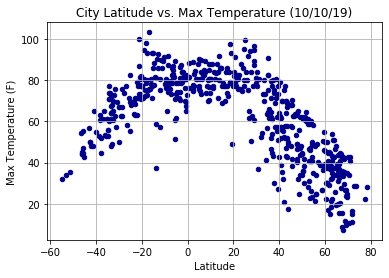

In [9]:
ax1 = weather_data.plot.scatter(x='Lat', y='Max Temp', c='DarkBlue')

# Adding grid, title, and labels
plt.grid(True)
plt.title('City Latitude vs. Max Temperature (' + time.strftime("%m/%d/%y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('output_data/Lat_vs_Temp.png', bbox_inches="tight")

#### Latitude vs. Humidity Plot

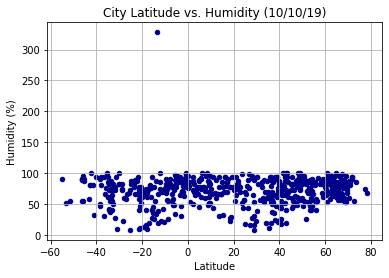

In [10]:
ax1 = weather_data.plot.scatter(x='Lat', y='Humidity', c='DarkBlue')

# Adding grid, title, and labels
plt.grid(True)
plt.title('City Latitude vs. Humidity (' + time.strftime("%m/%d/%y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/Lat_vs_Humidity.png', bbox_inches="tight")

#### Latitude vs. Cloudiness Plot

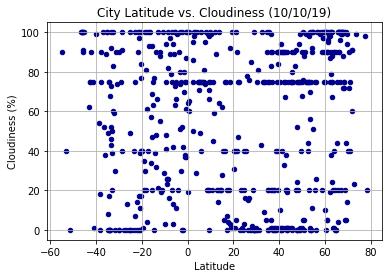

In [11]:
ax1 = weather_data.plot.scatter(x='Lat', y='Cloudiness', c='DarkBlue')

# Adding grid, title, and labels
plt.grid(True)
plt.title('City Latitude vs. Cloudiness (' + time.strftime("%m/%d/%y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('output_data/Lat_vs_Cloudiness.png', bbox_inches="tight")

#### Latitude vs. Wind Speed Plot

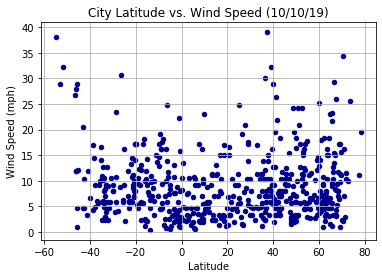

In [12]:
ax1 = weather_data.plot.scatter(x='Lat', y='Wind Speed', c='DarkBlue')

# Adding grid, title, and labels
plt.grid(True)
plt.title('City Latitude vs. Wind Speed (' + time.strftime("%m/%d/%y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('output_data/Lat_vs_WindSpeed.png', bbox_inches="tight")

### Observable trends
* 1. The temperature is highest 20 to 40 degrees north of the equator, which is consistent with the seasonal expectation.
* 2. Cloud coverage is consistent world-wide and across the range of latitude.
* 3. Wind speeds show a slight peak around the equator.
